# core

> Fill in a module description here

In [ ]:
#| default_exp api

In [ ]:
#| hide
from nbdev.showdoc import *


In [ ]:
#| export
import numpy as np
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torch
from urllib import request
import json
import requests
import os
import warnings
warnings.filterwarnings("ignore")
from pylsd.lsd import lsd
import cv2
from scipy.signal import argrelmin, argrelmax
import statistics

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# %matplotlib inline

In [ ]:
#| export
class ApiClient:
    def __init__(self, path, tmp_dir = "tmp"):
        self.input_path = path
        self.tmp_dir = tmp_dir
        os.makedirs(tmp_dir, exist_ok=True)
        pass

    @staticmethod
    def main(path, tmp_dir = "tmp"):
        ins = ApiClient(path, tmp_dir)
        otsu_path = tmp_dir + "/otsu.png"
        ApiClient.otsu(path, otsu_path)
        # self.path = path

    @staticmethod
    def otsu(input_path, output_path):
        '''
        大津の二値化
        '''

        img = cv2.imread(input_path)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        ret2, img_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

        cv2.imwrite(output_path, img_otsu)

        # otsu_path = self.tmp_dir + "/otsu.jpg"
        # cv2.imwrite(otsu_path, img_otsu)
        # self.otsu_path = otsu_path

    @staticmethod
    def skelton(input_path, output_path):
        '''
        細線化
        '''

        img = cv2.imread(input_path)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        # 二値画像反転
        image = cv2.bitwise_not(gray)

        skelton = cv2.ximgproc.thinning(image, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

        cv2.imwrite(output_path, skelton)

In [ ]:
show_doc(ApiClient)

---

### ApiClient

>      ApiClient (path, tmp_dir='tmp')

Initialize self.  See help(type(self)) for accurate signature.

In [ ]:
path = "data/612110.jpeg"
ins = ApiClient(path)


In [ ]:
show_doc(ApiClient.otsu)

---

### ApiClient.otsu

>      ApiClient.otsu (input_path, output_path)

大津の二値化

In [ ]:
otsu_path = "tmp/otsu.jpg"
ApiClient.otsu(path, otsu_path)

<matplotlib.image.AxesImage>

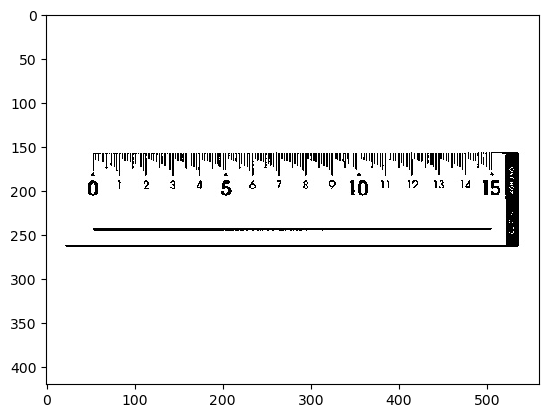

In [ ]:
plt.imshow(mpimg.imread(otsu_path),cmap="gray")

In [ ]:
show_doc(ApiClient.skelton)

---

### ApiClient.skelton

>      ApiClient.skelton (input_path, output_path)

細線化

In [ ]:
skelton_path = "tmp/skelton.jpg"
ApiClient.otsu(otsu_path, skelton_path)

<matplotlib.image.AxesImage>

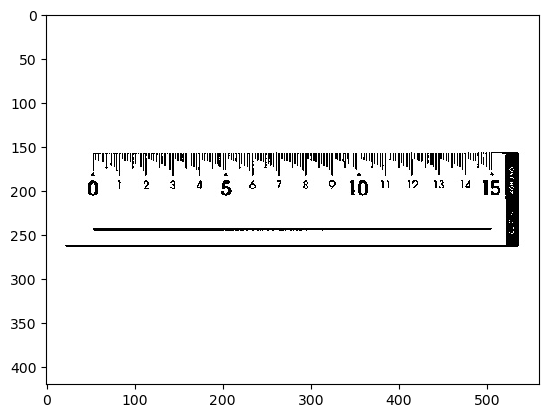

In [ ]:
plt.imshow(mpimg.imread(skelton_path),cmap="gray")

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()